<a href="https://colab.research.google.com/github/Praveen8925/Pytorch/blob/main/01_Linear_Model_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch as t
from torch import nn,tensor

In [79]:
s=t.tensor([[2,5],[6,8]])
s.ndim,s.shape

(2, torch.Size([2, 2]))

In [80]:
rand=t.rand(2)
rand

tensor([0.3829, 0.9593])

In [81]:
w=0.8
b=0.3

start=0
end=1
step=0.02
x=t.arange(start,end,step).unsqueeze(dim=1)
y=w*x+b
x[:10],y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3160],
         [0.3320],
         [0.3480],
         [0.3640],
         [0.3800],
         [0.3960],
         [0.4120],
         [0.4280],
         [0.4440]]))

In [82]:
test_size=int(0.8*len(x))
x_train,x_test=x[:test_size],x[test_size:]
y_train,y_test=y[:test_size],y[test_size:]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [83]:
import matplotlib.pyplot as plt
def plot_predictions(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,prediction=None):
  plt.figure(figsize=(5,5))
  plt.scatter(x_train,y_train,c="b",s=4,label="training data")
  plt.scatter(x_test,y_test,c="g",s=4,label="test data")
  if prediction is not None:
    plt.scatter(x_test,prediction,c="r",s=4,label="prediction")
  plt.legend(prop={"size":14})

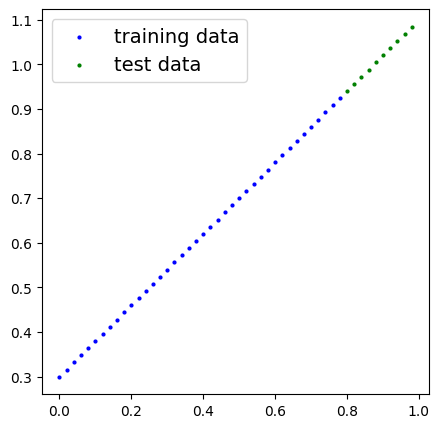

In [84]:
plot_predictions()


In [85]:
class linearmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.w=nn.Parameter(t.rand(1,requires_grad=True))
    self.b=nn.Parameter(t.rand(1,requires_grad=True))

  def forward(self,x):
    return self.w*x+self.b

In [86]:
t.manual_seed(42)

model_0=linearmodel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [87]:
with t.inference_mode():
  y_preds=model_0(x_test)
y_preds


tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


### parameter for optimizer(params=)



In [88]:
### parameter for optimizer(params=)
print(list(model_0.parameters()))

model_0.state_dict()

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]


OrderedDict([('w', tensor([0.8823])), ('b', tensor([0.9150]))])

In [89]:
#loss function
loss_fn=nn.L1Loss()
#optimizer
optimizer=t.optim.SGD(params=model_0.parameters(),lr=0.01)

In [90]:
epochs=100
epoch_count=[]
loss_values=[]
test_loss_values=[]
for e in range(epochs):
  model_0.train
  y_pred=model_0(x_train)
  #syntax-->loss(input,target)
  loss=loss_fn(y_pred,y_train)
  print(f"loss:{loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with t.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)
  if e%10==0:
    epoch_count.append(e)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch:{e} | loss:{loss} |test_loss:{test_loss}")
    print(model_0.state_dict())

loss:0.647088885307312
epoch:0 | loss:0.647088885307312 |test_loss:0.6747525930404663
OrderedDict([('w', tensor([0.8784])), ('b', tensor([0.9050]))])
loss:0.6355679631233215
loss:0.624047040939331
loss:0.612525999546051
loss:0.601004958152771
loss:0.5894839763641357
loss:0.5779630541801453
loss:0.56644207239151
loss:0.55492103099823
loss:0.54339998960495
loss:0.5318790674209595
epoch:10 | loss:0.5318790674209595 |test_loss:0.5400427579879761
OrderedDict([('w', tensor([0.8394])), ('b', tensor([0.8050]))])
loss:0.5203580856323242
loss:0.508837103843689
loss:0.4973161220550537
loss:0.48579511046409607
loss:0.4742741584777832
loss:0.46275320649147034
loss:0.4512321352958679
loss:0.43971118330955505
loss:0.4281901717185974
loss:0.41666921973228455
epoch:20 | loss:0.41666921973228455 |test_loss:0.4053329527378082
OrderedDict([('w', tensor([0.8004])), ('b', tensor([0.7050]))])
loss:0.4051482081413269
loss:0.39362722635269165
loss:0.3821062445640564
loss:0.37058526277542114
loss:0.359064251184

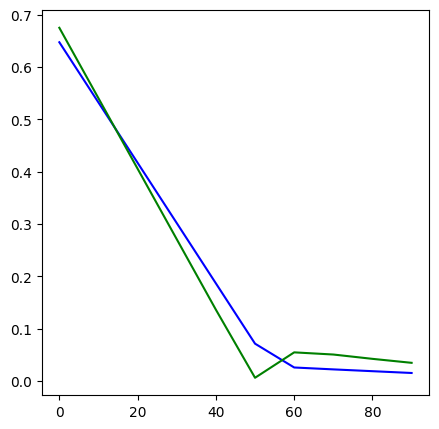

In [91]:
import numpy as np
plt.figure(figsize=(5,5))
plt.plot(epoch_count,np.array(t.tensor(loss_values).numpy()),c="b",label="training loss")
plt.plot(epoch_count,test_loss_values,c="g",label="test loss")
plt.show()

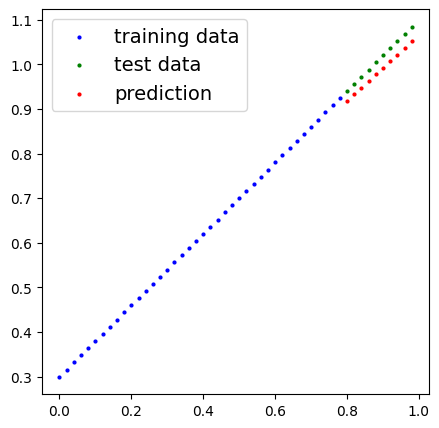

In [93]:
plot_predictions(prediction=test_pred)

###Second Model


In [94]:
x=t.arange(0,1,0.02).unsqueeze(dim=1)
y=0.5*x+0.7
#x[:10],y[:10]

In [95]:
device="cuda" if t.cuda.is_available() else "cpu"
device


'cuda'

In [96]:
test_size=int(0.8*len(x))
x_train,y_train=x[:test_size],x[:test_size]
x_test,y_test=x[test_size:],x[test_size:]
len(x_train,),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [104]:
class LinearModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear=nn.Linear(in_features=1,out_features=1)

  def forward(self,x :t.tensor)->t.Tensor:
    return self.Linear(x)


In [105]:
t.manual_seed(42)
model=LinearModel1()
model.state_dict()

OrderedDict([('Linear.weight', tensor([[0.7645]])),
             ('Linear.bias', tensor([0.8300]))])

In [106]:
model.to(device)


LinearModel1(
  (Linear): Linear(in_features=1, out_features=1, bias=True)
)

In [107]:
loss_fn=nn.L1Loss()
optimizer=t.optim.SGD(params=model.parameters(),lr=0.01)


In [100]:
# Put the Data Into Device
x_train=x_train.to(device).float()
y_train=y_train.to(device).float()
x_test=x_test.to(device).float()
y_test=y_test.to(device).float()

In [113]:
t.manual_seed(42)
epochs=200
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  model.train()
  y_pred=model(x_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with t.inference_mode():
    test=model(x_train)
    loss_test=loss_fn(test,y_train)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(loss_test)
    print(f"epoch:{epoch} | loss:{loss} |test_loss:{loss_test}")

epoch:0 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:10 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:20 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:30 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:40 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:50 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:60 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:70 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:80 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:90 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:100 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:110 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:120 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:130 | loss:0.004285582806915045 |test_loss:0.007235413882881403
epoch:140 | loss:0.004285582806

In [119]:
with t.inference_mode():
  y_pred=model(x_test)
y_pred = y_pred.cpu()

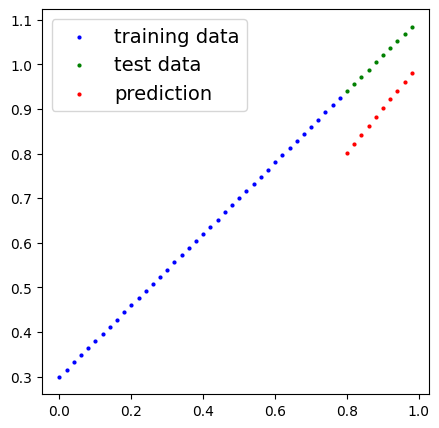

In [120]:
plot_predictions(prediction=y_pred)